# CS181_P1 Tuning Model on New Features

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## 0 Read in data

In [2]:
X_fp_train_sub7 = pd.read_csv("X_fp_train_sub7.csv")
X_fp_train_sub7.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
Y_fp_train_sub7 = pd.read_csv("Y_fp_train_sub7.csv")
Y_fp_train_sub7.head()

,0
0,1.57
1,1.76
2,1.41
3,2.80
4,1.46


In [4]:
X_fp_train_sub7 = X_fp_train_sub7.values

In [5]:
Y_fp_train_sub7 = Y_fp_train_sub7.values

## 1 Feature Selection
### 1. split data into test and training subset

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_fp_train_sub7, Y_fp_train_sub7, test_size=0.20)

In [7]:
# see the shape of data after split:
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (100000, 2048)
shape of x_test:  (25000, 2048)
shape of y_train:  (100000, 1)
shape of y_test:  (25000, 1)


### 2. fit baseline model 

In [8]:
# 1.Random Forest
# 1.1 fit the model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(x_train, y_train)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [10]:
# 1.2 report R^2 for training and test
print("R^2 for training set is: ", r2_score(y_train, RF.predict(x_train)))
print("R^2 for test set is: ", r2_score(y_test, RF.predict(x_test)))
print("MSE for training set is: ", mean_squared_error(y_train, RF.predict(x_train)))
print("MSE for test set is: ", mean_squared_error(y_test, RF.predict(x_test)))

R^2 for training set is:  0.987748082947
R^2 for test set is:  0.935560637534
MSE for training set is:  0.00203335191227
MSE for test set is:  0.0106719967537


### 3. Drop features with importance = 0

In [11]:
RF_imp = RF.feature_importances_
i0 = (RF_imp == 0)
x_train_1 = x_train[:,i0 == False]
x_test_1 = x_test[:,i0 == False]
# view data structure after drop
print("Train features after 1 drop:", x_train_1.shape)
print("Train gap:", y_train.shape)
print("Test features after 1 drop:", x_test_1.shape)

Train features after 1 drop: (100000, 1702)
Train gap: (100000, 1)
Test features after 1 drop: (25000, 1702)


### 4. refit baseline models

In [12]:
RF_1 = RandomForestRegressor().fit(x_train_1, y_train)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [15]:
print("R^2 for training set is: ", r2_score(y_train, RF_1.predict(x_train_1)))
print("R^2 for test set is: ", r2_score(y_test, RF_1.predict(x_test_1)))
print("MSE for training set is: ", mean_squared_error(y_train, RF_1.predict(x_train_1)))
print("MSE for test set is: ", mean_squared_error(y_test, RF_1.predict(x_test_1)))

R^2 for training set is:  0.987802431927
R^2 for test set is:  0.935891401396
MSE for training set is:  0.0020243320501
MSE for test set is:  0.0106172179551


### 5. further drop features with importance < 0

In [17]:
RF_imp_1 = RF_1.feature_importances_
i1 = (RF_imp_1 <= 0)
x_train_2 = x_train_1[:,i1 == False]
x_test_2 = x_test_1[:,i1 == False]
# view data structure after drop
print("Train features after 1 drop:", x_train_1.shape)
print("Train gap:", y_train.shape)
print("Test features after 1 drop:", x_test_1.shape)

Train features after 1 drop: (100000, 1702)
Train gap: (100000, 1)
Test features after 1 drop: (25000, 1702)


#### Summary: we can't drop much by "importance <=0:"

#### 2048 -> 1699

### 6. plot the distribution of features importance
- see whether we can drop more by setting threshold

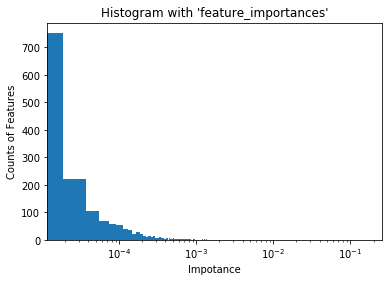

In [18]:
plt.hist(RF_imp_1, bins ='auto')
plt.title("Histogram with 'feature_importances'")
plt.xscale('log')
plt.xlabel("Impotance")
plt.ylabel("Counts of Features")
plt.savefig('his_feature_importance.png')
plt.show()

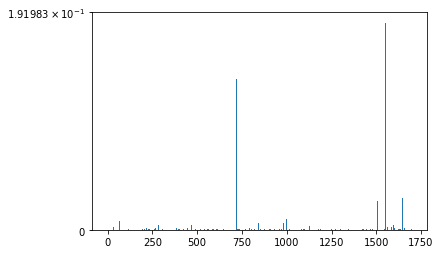

In [45]:
plt.bar(range(len(RF_1.feature_importances_)), RF_1.feature_importances_, 2)
plt.yscale('symlog')
plt.show()

#### Summary: scince more importance are relatively small, it's risky to drop more features by setting up threshold.

## 2 Tune Hyper parameters via 5-fold CV

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameters = {#"max_depth": [150,450,750,1050,1350,1650]
                        #,"min_samples_split" :[2,10,50,500,1000]
                        "n_estimators" : [5, 10, 20]}
                        #,"min_samples_leaf": [2,10,50,500,1000]
                        #,"max_features": ('auto','sqrt','log2')
rf_regr = RandomForestRegressor()
model = GridSearchCV(rf_regr,parameters, cv = 5)
fit = model.fit(x_train_1,y_train)
learned_parameters = fit.best_params_ 
# Rerun model on fitted parameters 
rfr = RandomForestRegressor(#max_depth = learned_parameters["max_depth"]
                            max_features = 'sqrt'
                            #,min_samples_leaf = learned_parameters['min_samples_leaf']
                            #,min_samples_split = learned_parameters['min_samples_split']
                            ,n_estimators = learned_parameters['n_estimators']
                            ,random_state = 78)
rfr_fit = rfr.fit(x_train_1,y_train)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xihanzhang/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xihanzhang/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/xihanzhang/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:

In [22]:
print("R^2 for training set is: ", r2_score(y_train, rfr_fit.predict(x_train_1)))
print("R^2 for test set is: ", r2_score(y_test, rfr_fit.predict(x_test_1)))
print("MSE for training set is: ", mean_squared_error(y_train, rfr_fit.predict(x_train_1)))
print("MSE for test set is: ", mean_squared_error(y_test, rfr_fit.predict(x_test_1)))

R^2 for training set is:  0.98556747146
R^2 for test set is:  0.919003528197
MSE for training set is:  0.00239525042309
MSE for test set is:  0.0134140694611


In [24]:
print("Best 'number of estimator' is: ", learned_parameters['n_estimators'])

Best 'number of estimator' is:  20


It would always choose the largest number of estimator, to kill more varriance, we just need to choose the reasonable one

## Generate file

In [ ]:
write_to_file("Xihan.csv", RF_pred)

In [ ]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")